# **Business Case: LoanTap Logistic Regression**

**LoanTap** is an online platform committed to delivering customized loan products to millennials. They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly terms to salaried professionals and businessmen.

The data science team at LoanTap is building an underwriting layer to determine the creditworthiness of MSMEs as well as individuals.

LoanTap deploys formal credit to salaried individuals and businesses 4 main financial instruments:



*   Personal Loan
*   EMI Free Loan

*   Personal Overdraft
*   Advance Salary Loan

This case study will focus on the underwriting process behind Personal Loan only.

**Problem Statement:** Given a set of attributes for an Individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations?

In [111]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [112]:
# converting data into dataframe

loantap  = pd.read_csv("logistic_regression.csv")
loantap.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [113]:
# making an copy of the dataset

df = loantap.copy()

### Identification of variables

In [114]:
df.shape

(396030, 27)

In [115]:
# data info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [116]:
# Checking of null values

df.isna().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_title,22927
emp_length,18301
home_ownership,0
annual_inc,0


In [117]:
# Percentage of null values in each columns

df.isna().sum()/len(df)*100

,0
loan_amnt,0.000000
term,0.000000
int_rate,0.000000
installment,0.000000
grade,0.000000
sub_grade,0.000000
emp_title,5.789208
emp_length,4.621115
home_ownership,0.000000
annual_inc,0.000000


### Analysing the basic metrics

In [118]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,NaN,NaN,NaN,14113.888089,8357.441341,500.0,8000.0,12000.0,20000.0,40000.0
term,396030,2,36 months,302005,NaN,NaN,NaN,NaN,NaN,NaN,NaN
int_rate,396030.0,NaN,NaN,NaN,13.6394,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,NaN,NaN,NaN,431.849698,250.72779,16.08,250.33,375.43,567.3,1533.81
grade,396030,7,B,116018,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sub_grade,396030,35,B3,26655,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emp_title,373103,173105,Teacher,4389,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emp_length,377729,11,10+ years,126041,NaN,NaN,NaN,NaN,NaN,NaN,NaN
home_ownership,396030,6,MORTGAGE,198348,NaN,NaN,NaN,NaN,NaN,NaN,NaN
annual_inc,396030.0,NaN,NaN,NaN,74203.175798,61637.621158,0.0,45000.0,64000.0,90000.0,8706582.0


#### Insights

**Outliers:** The significant differences between mean & median in key attributes like loan amount and revolving balance indicate potential outliers.

**Loan Duration Preference:** A preference for 36-month loan terms among borrowers suggests a balance between manageable installments.

**Home Ownership Trends:** The prevalence of applicants with mortgaged homes suggests financial stability or a need for substantial, property-secured loans.

**Successful Loan Repayment:** Most loans being fully paid off reflects positively on borrowers' financial commitment, indicating effective lending criteria.

**Debt Consolidation Dominance:** The primary use of loans for debt consolidation highlights a common strategy to manage or reduce high-interest debt.

**Individual Borrowers:** The predominance of individual applicants suggests that personal loans are a major market segment.

In [119]:
n_columns = loantap.select_dtypes('float64').columns.tolist()\

n_columns

['loan_amnt',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'mort_acc',
 'pub_rec_bankruptcies']

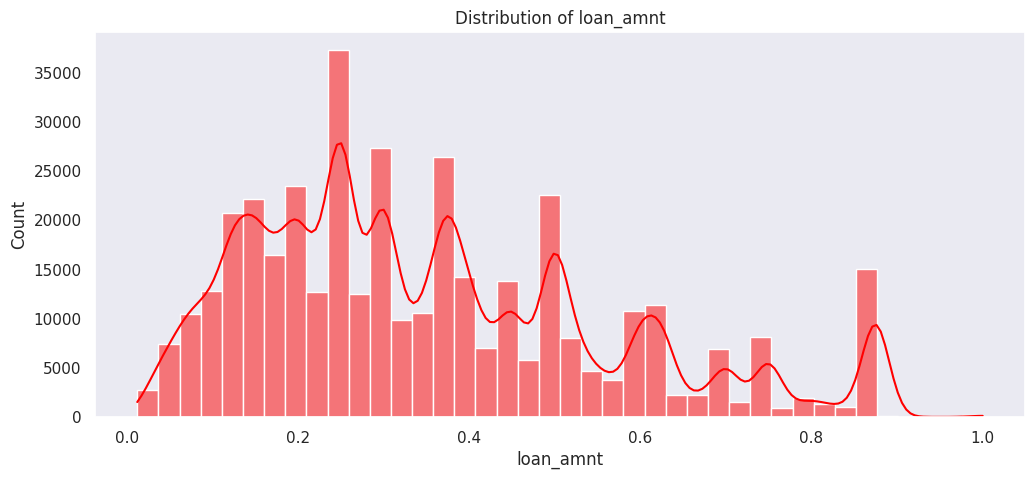

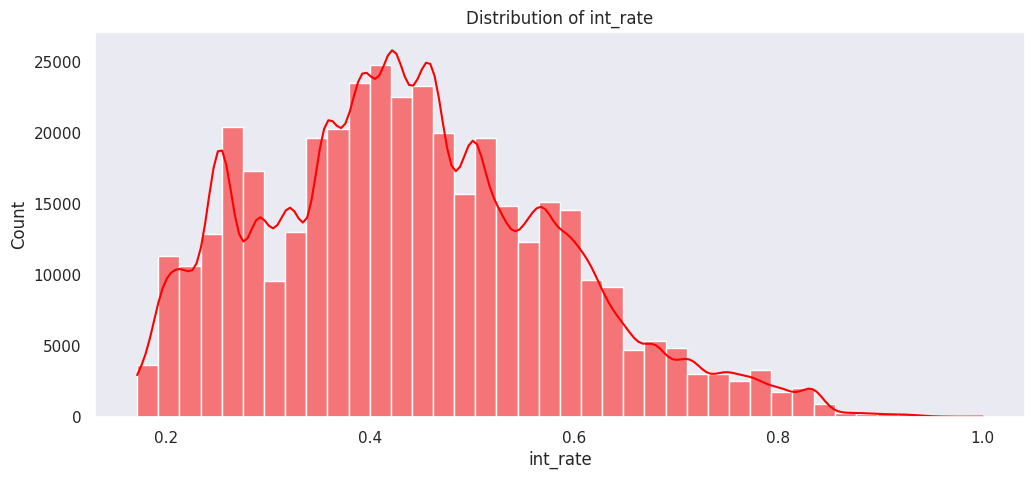

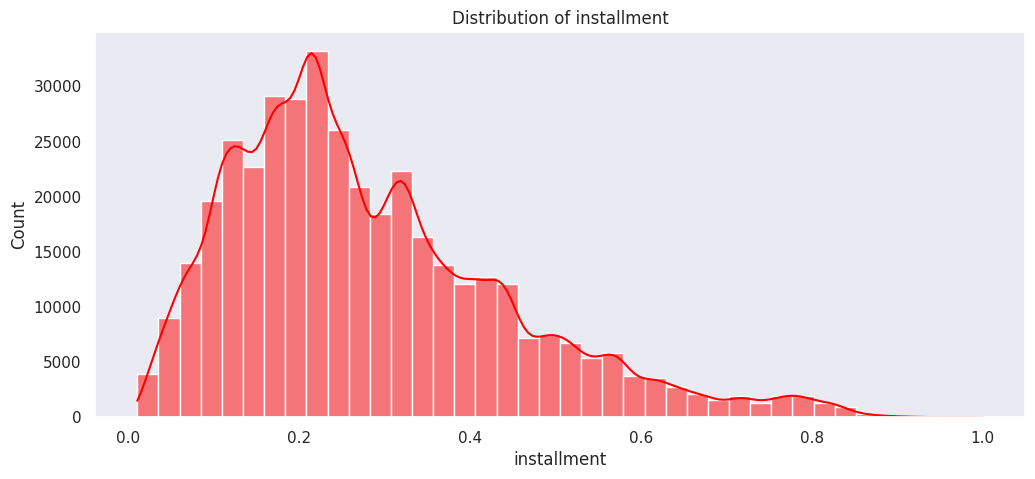

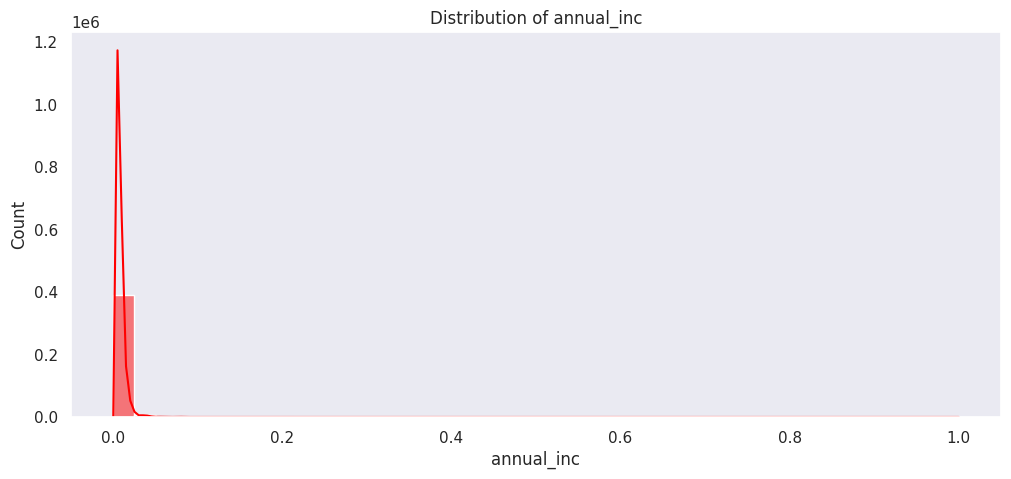

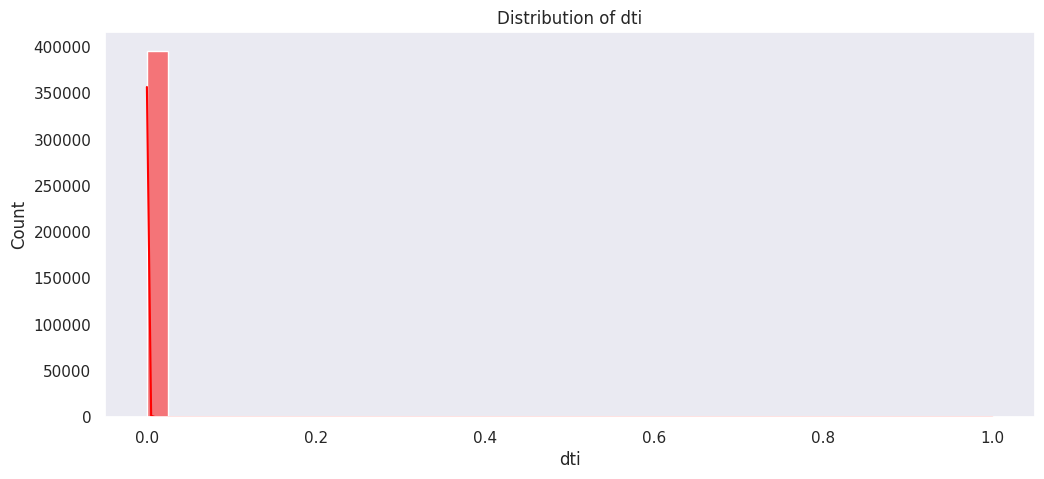

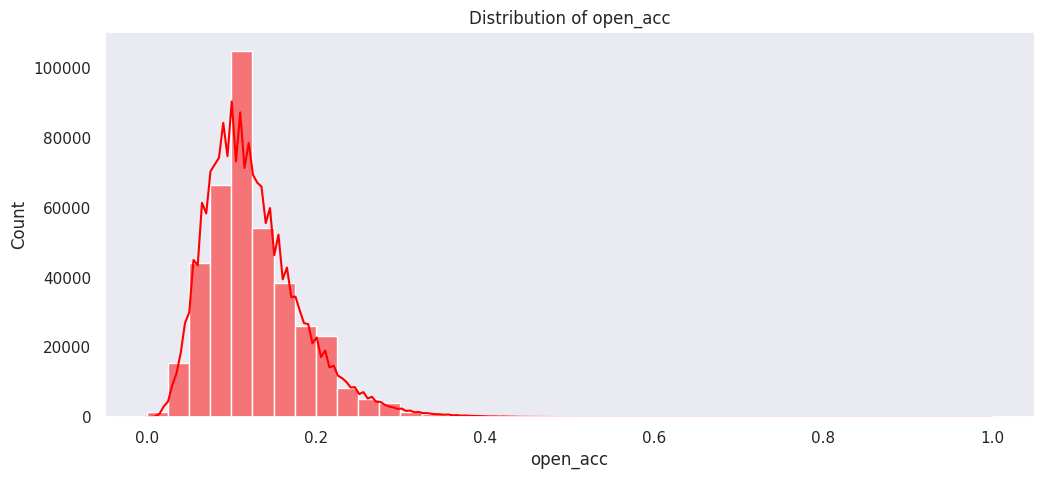

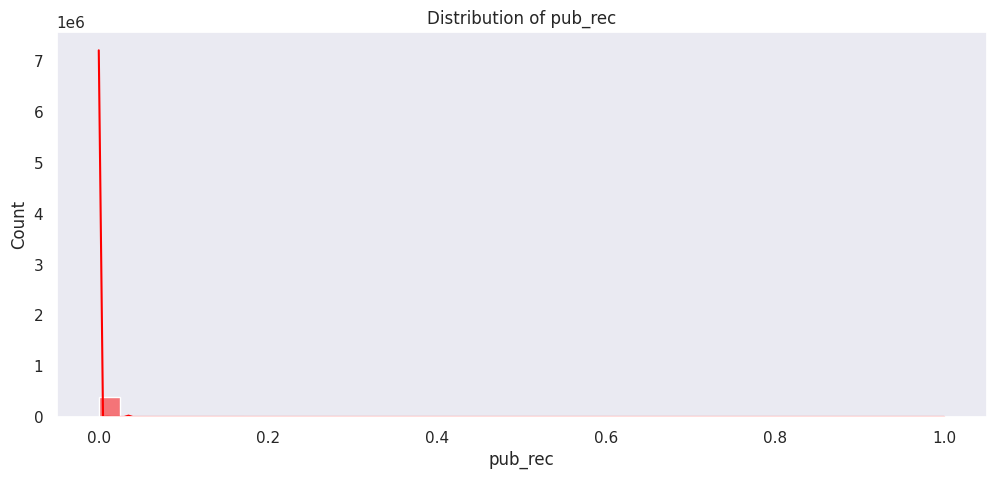

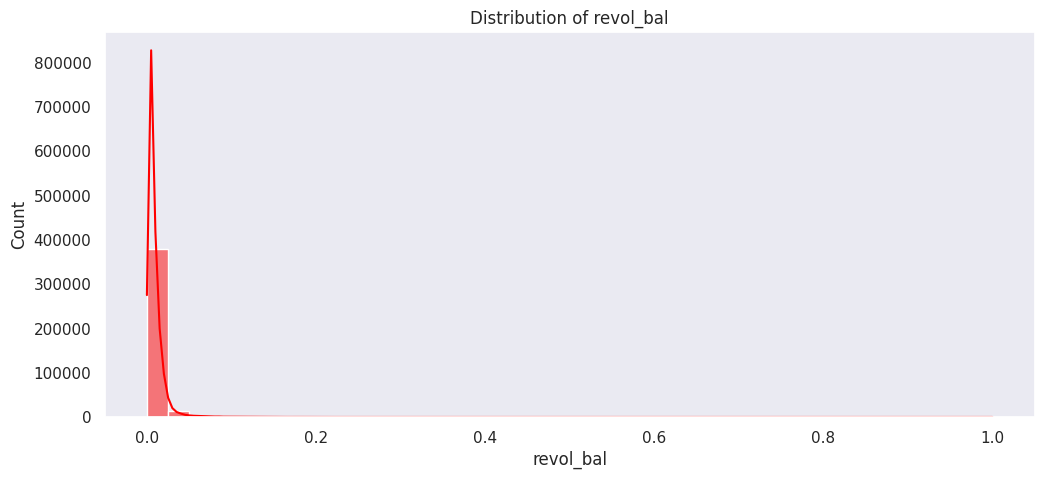

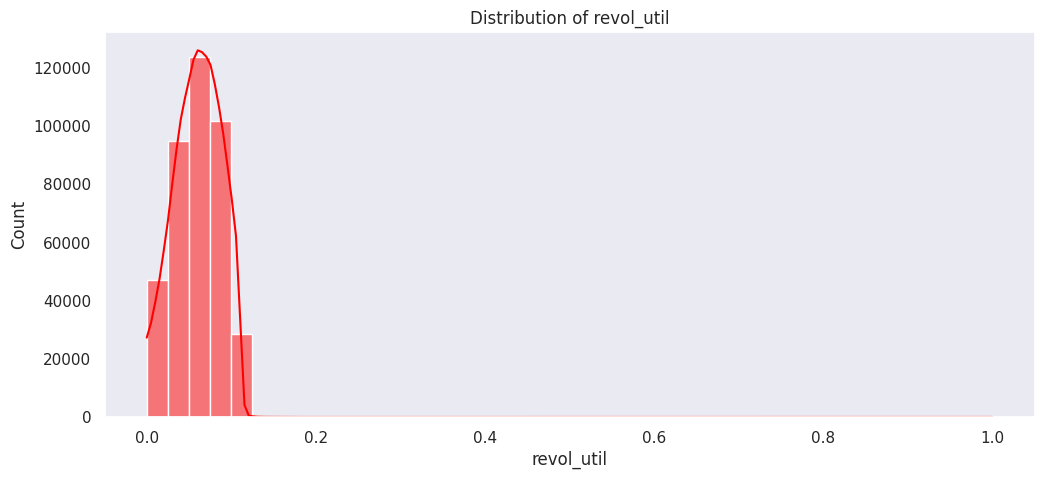

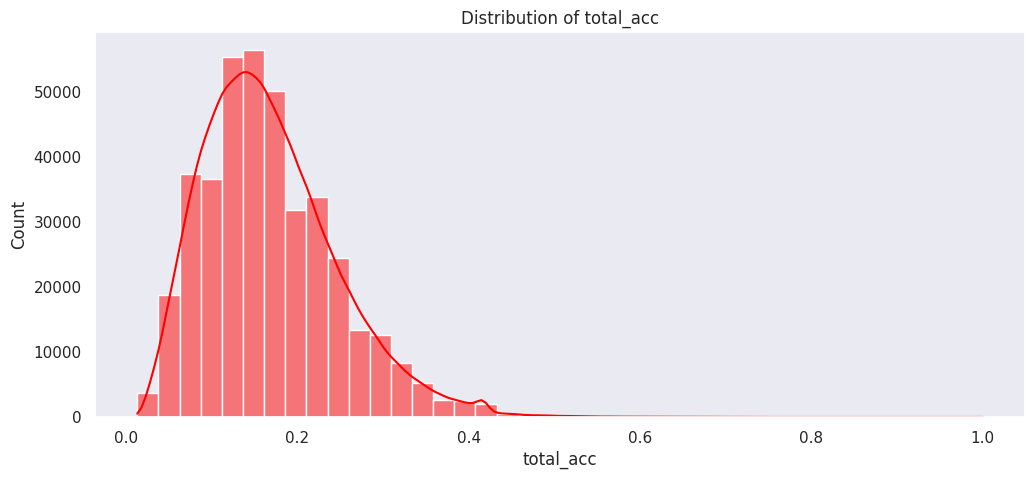

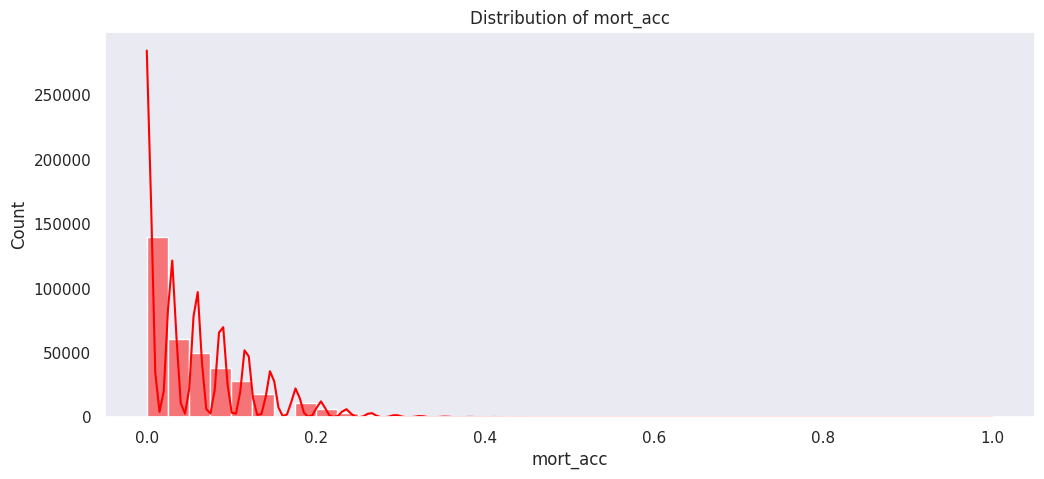

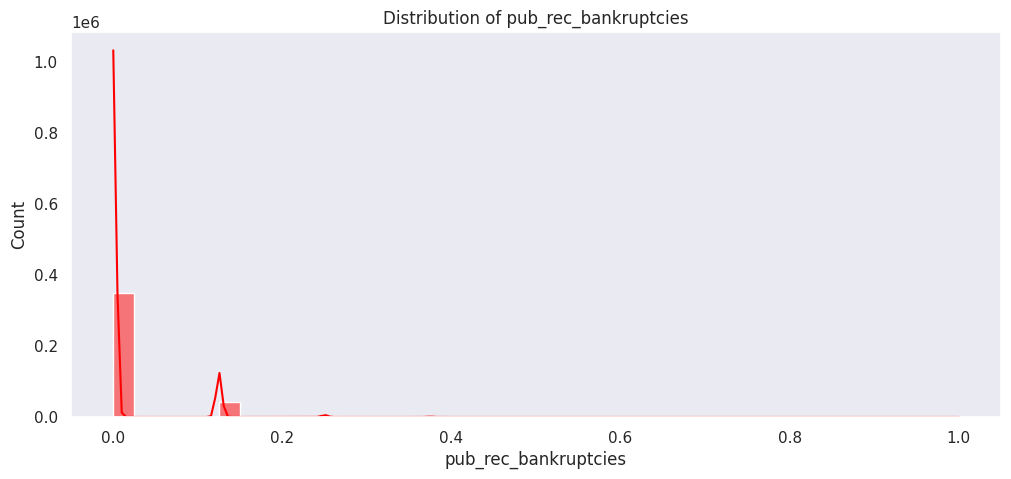

In [120]:
for i in n_columns:
    plt.figure(figsize=(12,5))
    plt.title("Distribution of {}".format(i))
    sns.histplot(df[i]/df[i].max(), kde=True,color="red", bins=40)
    plt.show()

In [121]:
c_columns = ['home_ownership', 'verification_status', 'loan_status', 'application_type', 'grade', 'sub_grade', 'term']

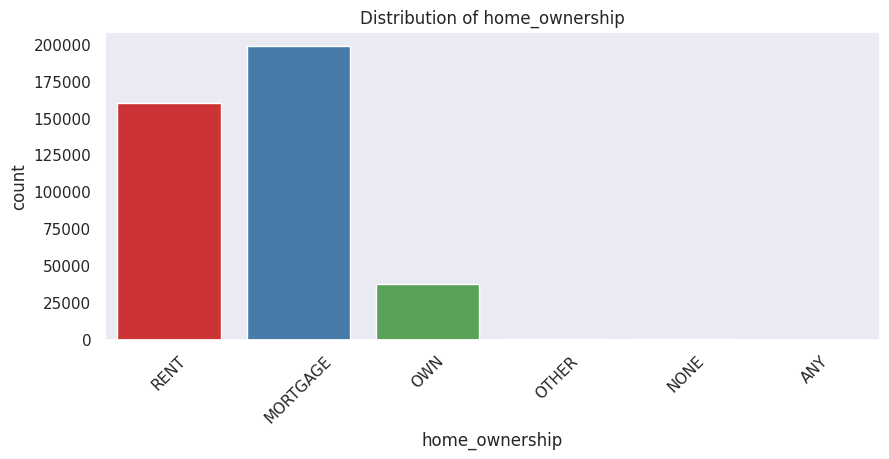

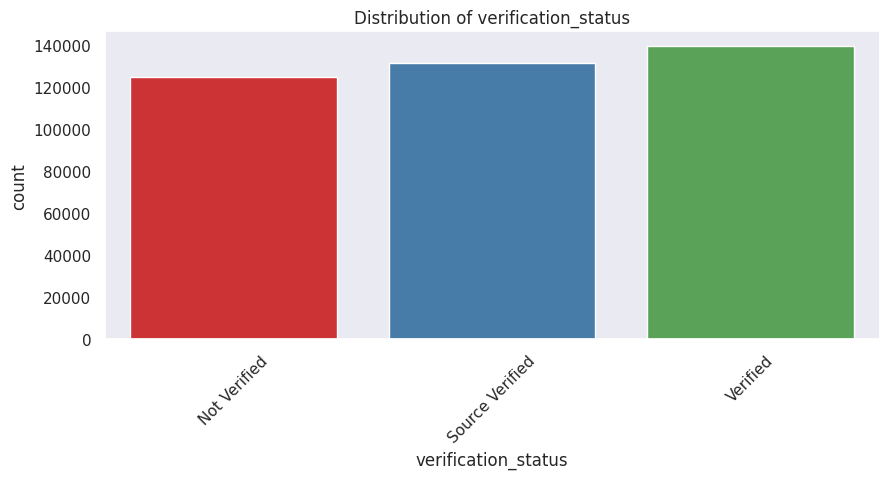

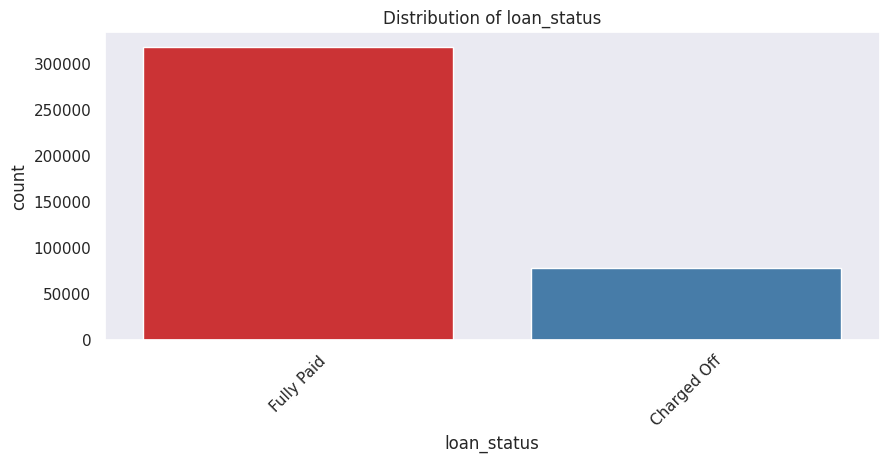

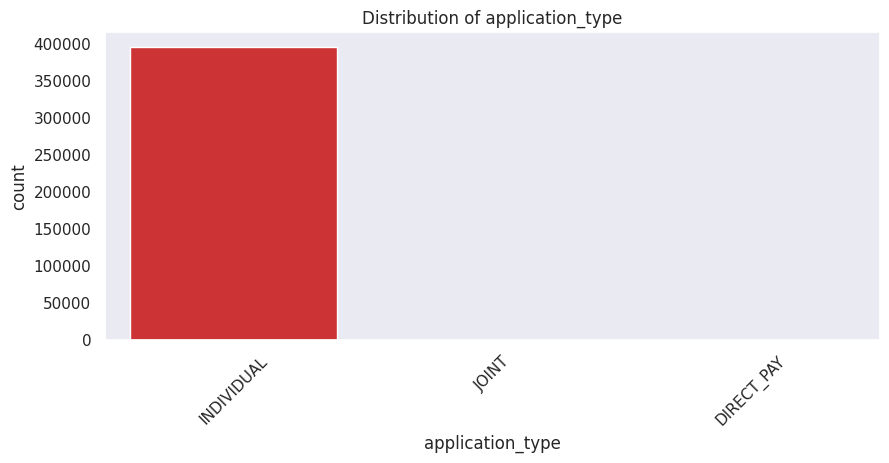

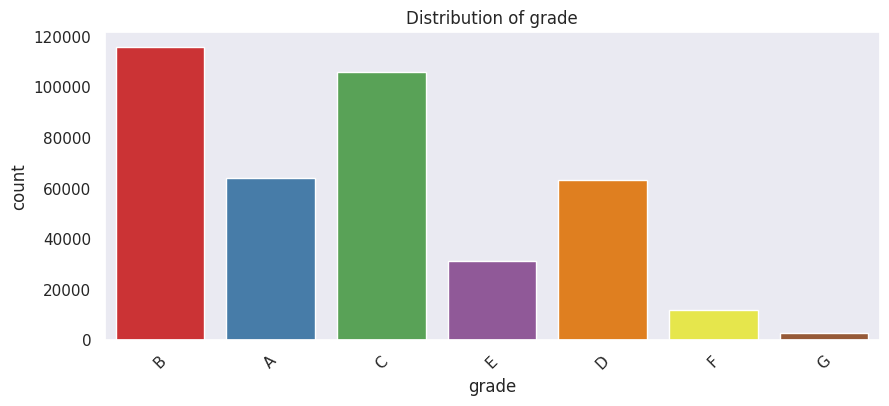

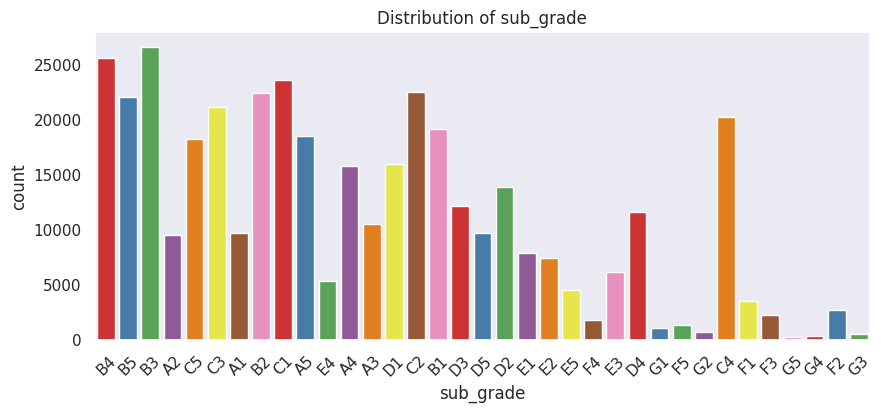

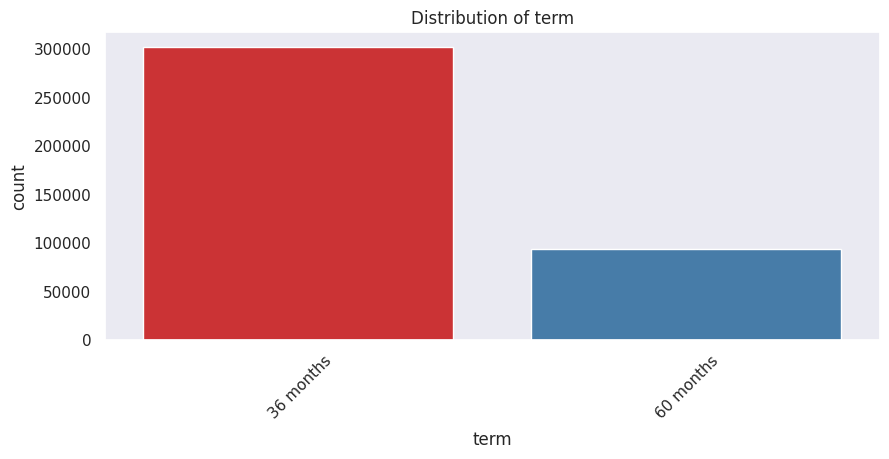

In [122]:
custom_palette = sns.color_palette("Set1", 8)

for i in c_columns:
    plt.figure(figsize=(10, 4))
    sns.set(style="dark")
    plt.title(f'Distribution of {i}')
    sns.countplot(data=df, x=i, palette=custom_palette)
    plt.xticks(rotation=45)
    plt.show()

### Bivariate Analysis

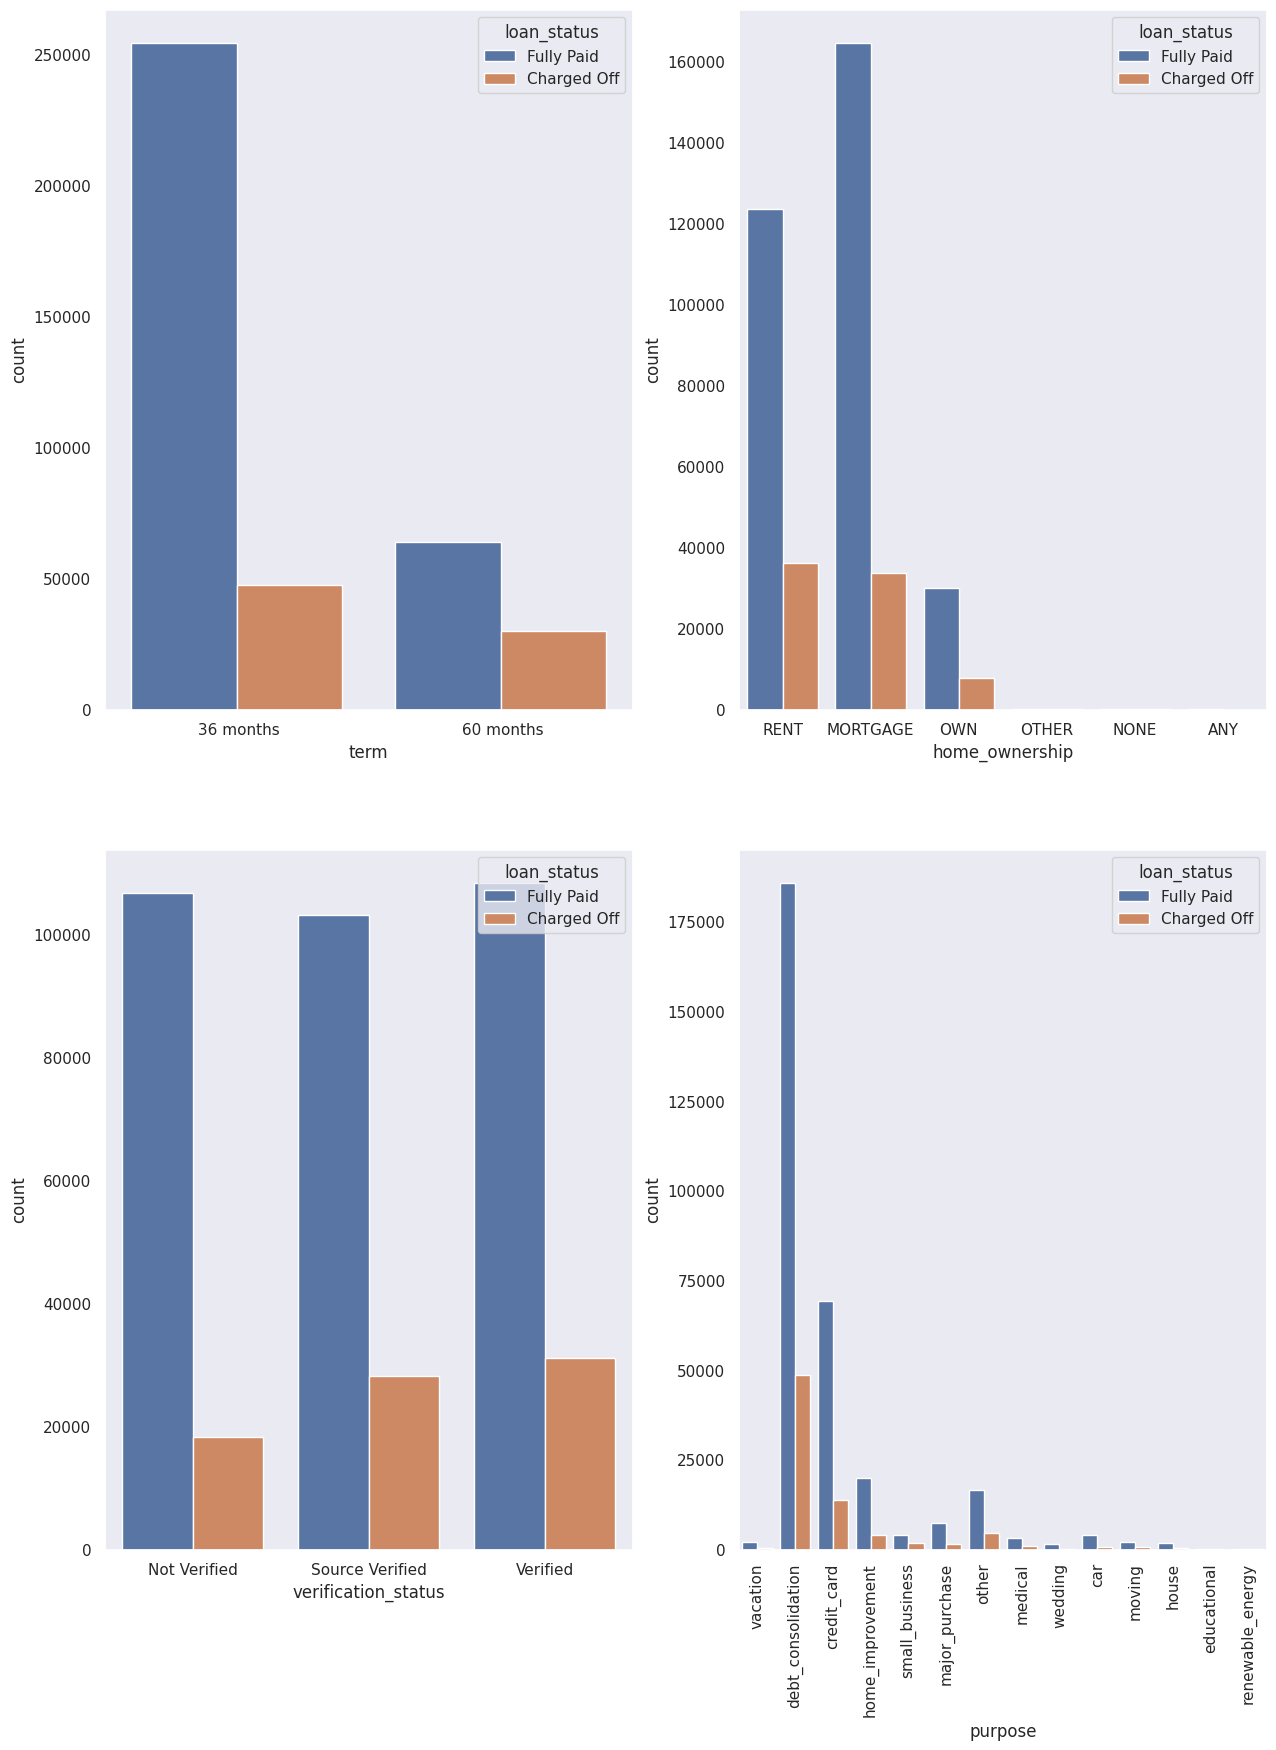

In [123]:
plt.figure(figsize=(15,20))

plt.subplot(2,2,1)
sns.countplot(x='term',data=df,hue='loan_status')

plt.subplot(2,2,2)
sns.countplot(x='home_ownership',data=df,hue='loan_status')

plt.subplot(2,2,3)
sns.countplot(x='verification_status',data=df,hue='loan_status')

plt.subplot(2,2,4)
g=sns.countplot(x='purpose',data=df,hue='loan_status')
g.set_xticklabels(g.get_xticklabels(),rotation=90)

plt.show()

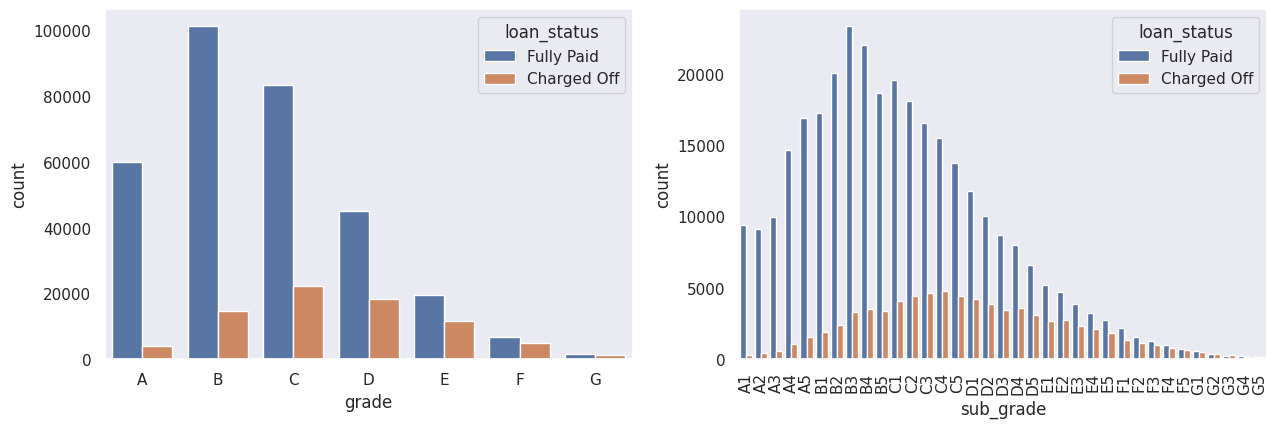

In [124]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = sorted(loantap.grade.unique().tolist())
sns.countplot(x='grade', data=df, hue='loan_status', order=grade)

plt.subplot(2, 2, 2)
sub_grade = sorted(loantap.sub_grade.unique().tolist())
g = sns.countplot(x='sub_grade', data=df, hue='loan_status', order=sub_grade)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

plt.show()

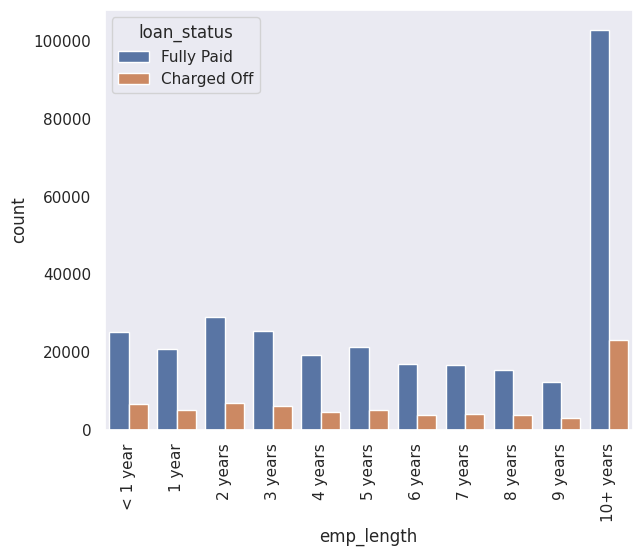

In [125]:
plt.figure(figsize=(15,12))

plt.subplot(2,2,1)
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years',
          '6 years', '7 years', '8 years', '9 years', '10+ years',]
g=sns.countplot(x='emp_length',data=df,hue='loan_status',order=order)
g.set_xticklabels(g.get_xticklabels(),rotation=90)

plt.show()

#### Insights

**Loan Terms:** The most popular loan term is 36 months, with a high completion rate.

**Loan Types:** Mortgages and rental loans are the most common loan types. Debt consolidation loans are also frequently used.

**Creditworthiness:** Borrowers with a credit grade of "B" and a subgrade of "B3" tend to have the highest repayment rates.

**Occupations:** Managers and teachers are the professions with the highest loan approval rates.

**Repayment:** Individuals employed for over 10 years demonstrate a strong track record of loan repayment.

### Correlation Analysis

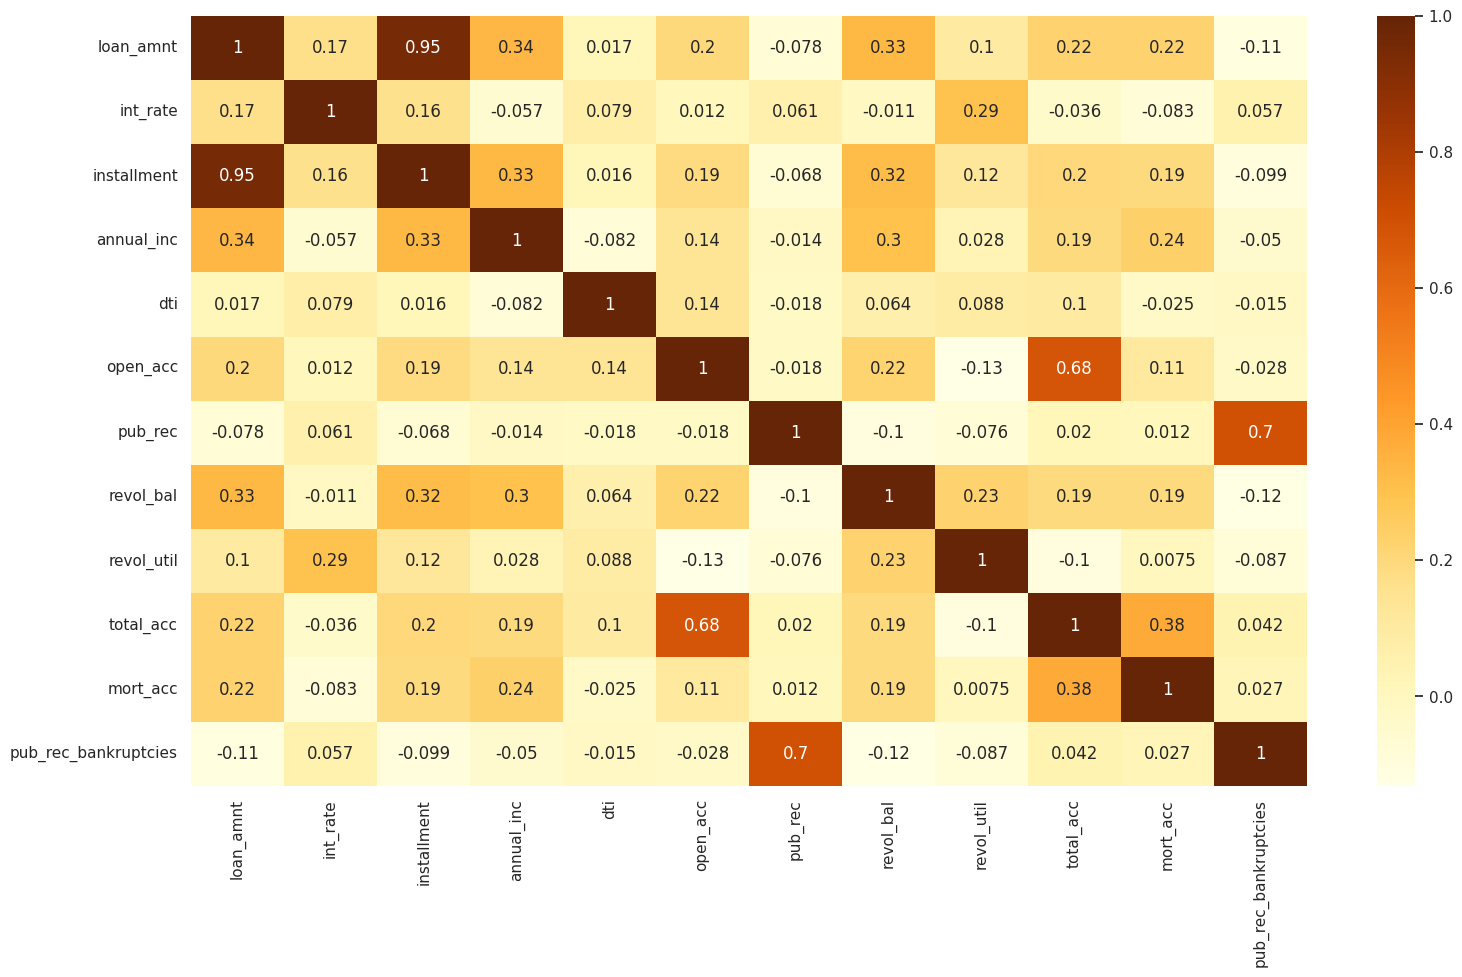

In [126]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(numeric_only=True), cmap = 'YlOrBr', annot = True)
plt.show()

In [127]:
df.corr(numeric_only=True)

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


### Insights:

- Positive correlation with annual income (annual_inc) - Higher income allows for larger loan applications.

- Weak positive correlation with installment amount (installment) - Makes sense as larger loans will typically have higher installments.

- Weak positive correlation with total accounts (total_acc) and mortgage accounts (mort_acc) - Borrowers with more established credit lines may be eligible for higher loan amounts.

- Weak negative correlation with annual income (annual_inc) - Generally, borrowers with higher income qualify for lower interest rates.

- Weak positive correlation with total accounts (total_acc) and mortgage accounts (mort_acc) - People with a higher income may tend to have more credit accounts.

- Positive correlation between revolving balance (revol_bal) and credit line utilization (revol_util) - This indicates that people with higher credit balances also tend to have a higher utilization ratio.

- Weak positive correlation between number of open accounts (open_acc) and total accounts (total_acc) - As expected, people with more open accounts tend to have more total accounts.

### Data Preprocessing using Feautre Engineering

In [128]:
def pub_rec(number):
    if number == 0.0:
        return 0
    else:
        return 1

def mort_acc(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number


def pub_rec_bankruptcies(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number

In [129]:
df['pub_rec']=df.pub_rec.apply(pub_rec)

df['mort_acc']=df.mort_acc.apply(mort_acc)

df['pub_rec_bankruptcies']=df.pub_rec_bankruptcies.apply(pub_rec_bankruptcies)

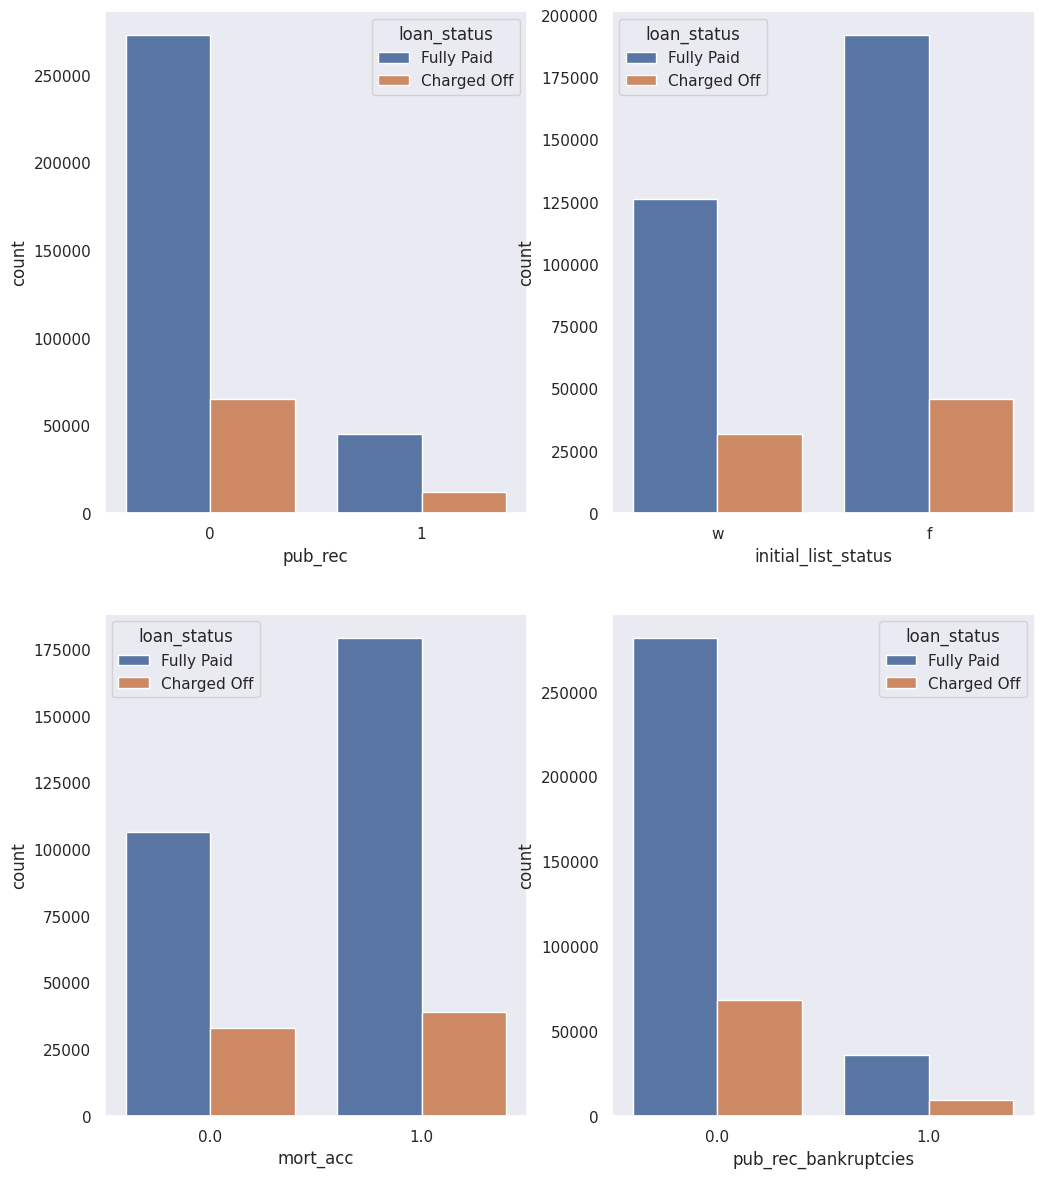

In [130]:
plt.figure(figsize=(12,30))

plt.subplot(4,2,1)
sns.countplot(x='pub_rec',data=df,hue='loan_status')

plt.subplot(4,2,2)
sns.countplot(x='initial_list_status',data=df,hue='loan_status')

plt.subplot(4,2,3)
sns.countplot(x='mort_acc',data=df,hue='loan_status')

plt.subplot(4,2,4)
sns.countplot(x='pub_rec_bankruptcies',data=df,hue='loan_status')

plt.show()

#### Most the loan disbursed to the people who do not hold bankrupties record have successfully paid loan

### Duplicate checks

In [131]:
df.duplicated().sum()

0

### Missing values

In [132]:
df.isnull().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_title,22927
emp_length,18301
home_ownership,0
annual_inc,0


In [133]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

total_acc_avg = numeric_columns.groupby('total_acc')['mort_acc'].mean()

def fill_mort_acc(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc].round()
    else:
        return mort_acc

df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [134]:
df.isnull().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_title,22927
emp_length,18301
home_ownership,0
annual_inc,0


In [135]:
# droping remaining null values

df.dropna(inplace=True)

df.shape

(370621, 27)

### Outlier Detection

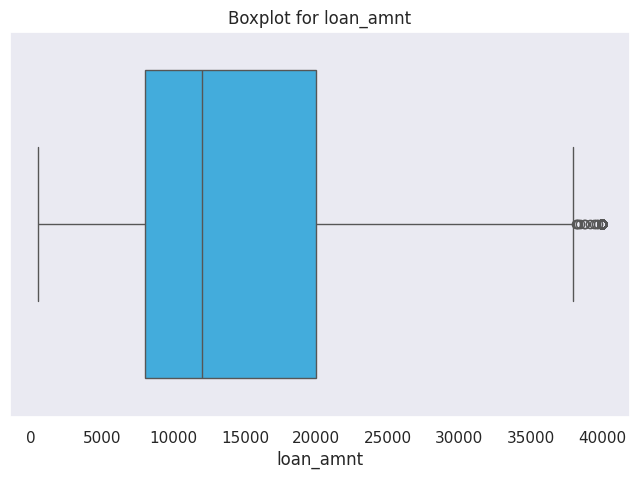

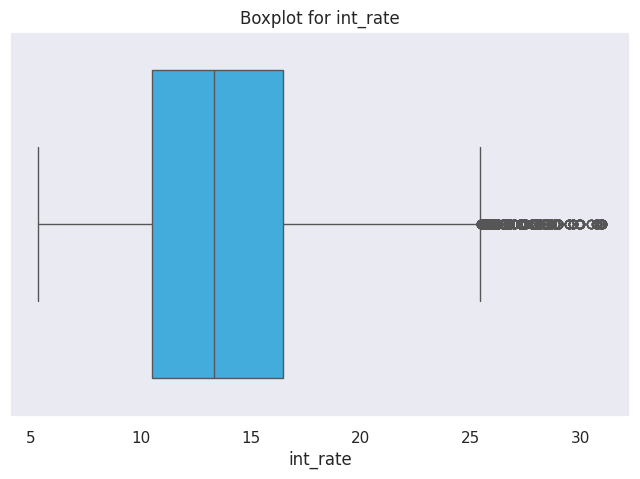

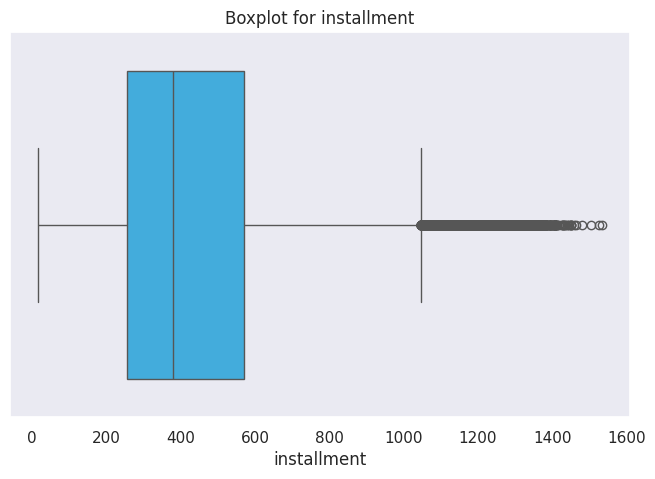

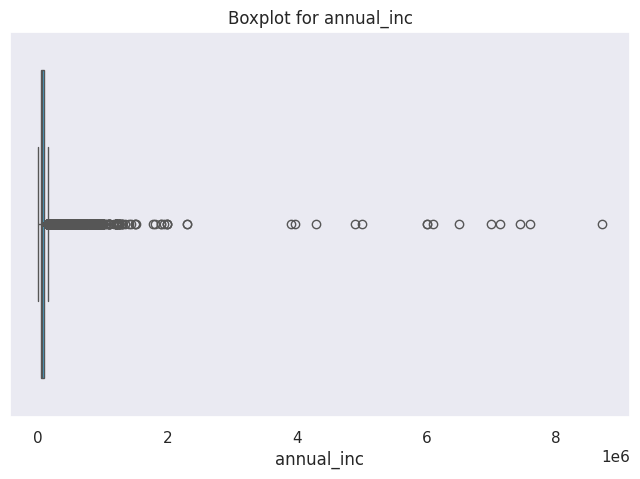

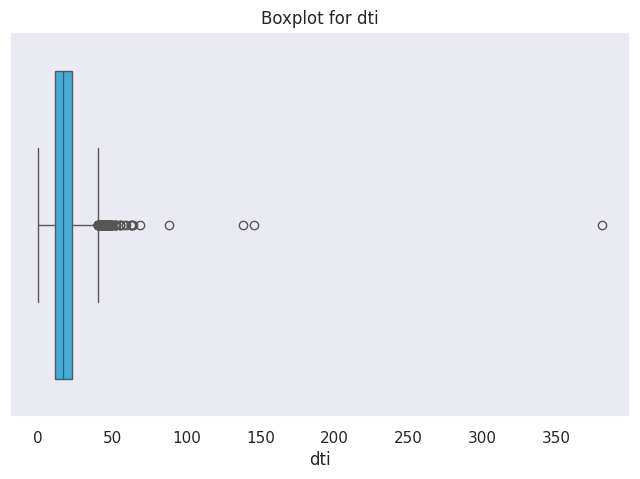

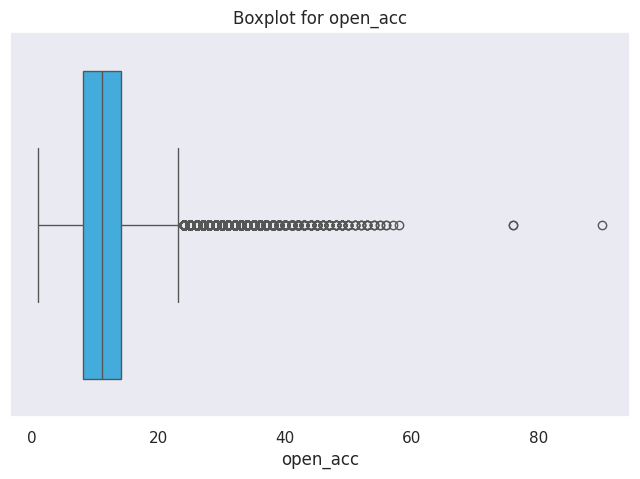

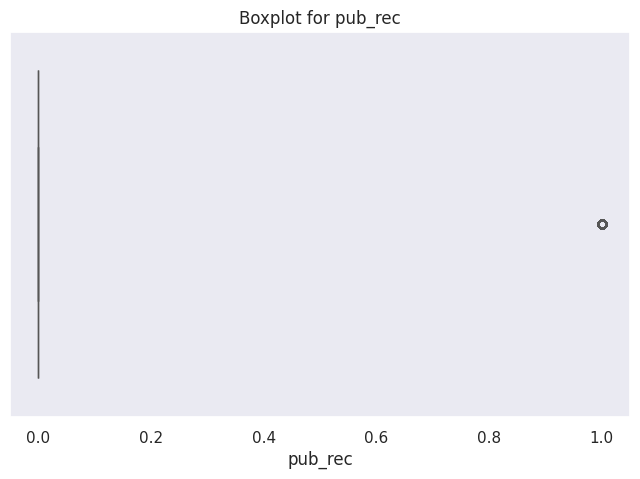

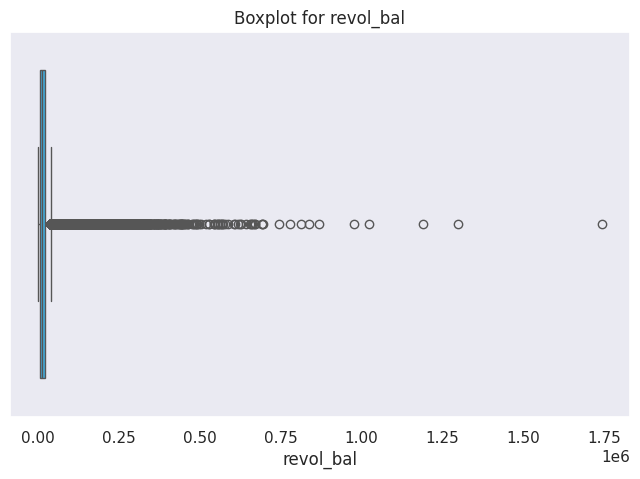

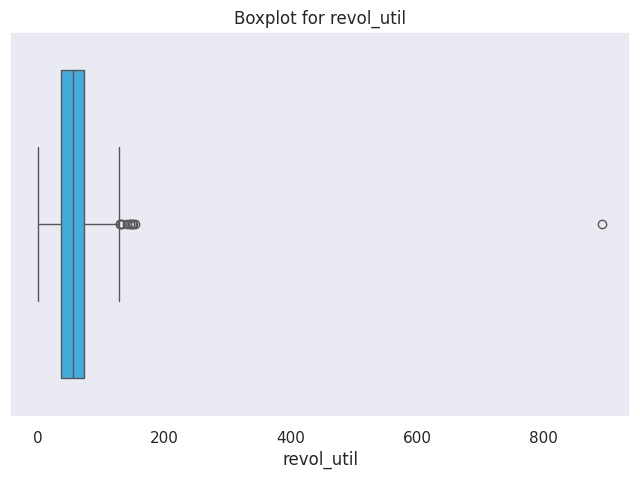

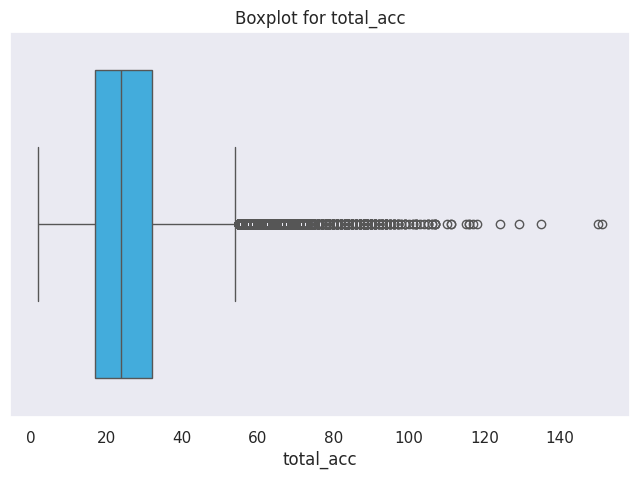

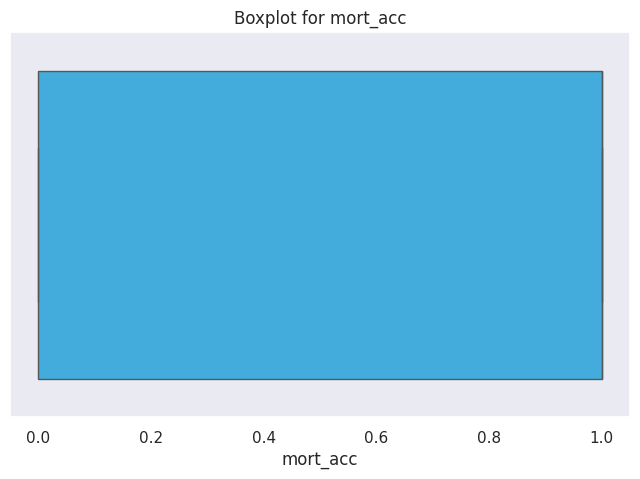

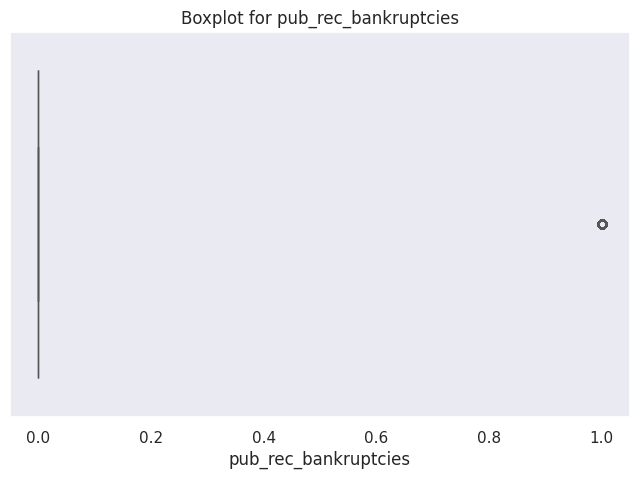

In [136]:
def box_plot(col):
    if col in df.columns:
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=df[col],color="#29B6F6")
        plt.title('Boxplot for {}'.format(col))
        plt.show()
    else:
        print(f"Column '{col}' not found in the DataFrame.")

for col in n_columns:
    box_plot(col)

In [137]:
# Outlier treatment

for col in n_columns:
    if col in df.columns:
        mean = df[col].mean()
        std = df[col].std()
        upper_limit = mean + 3 * std
        lower_limit = mean - 3 * std
        df = df[(df[col] < upper_limit) & (df[col] > lower_limit)]

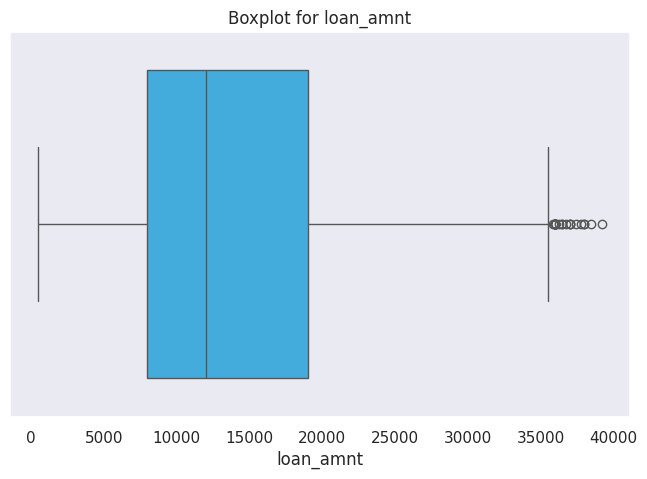

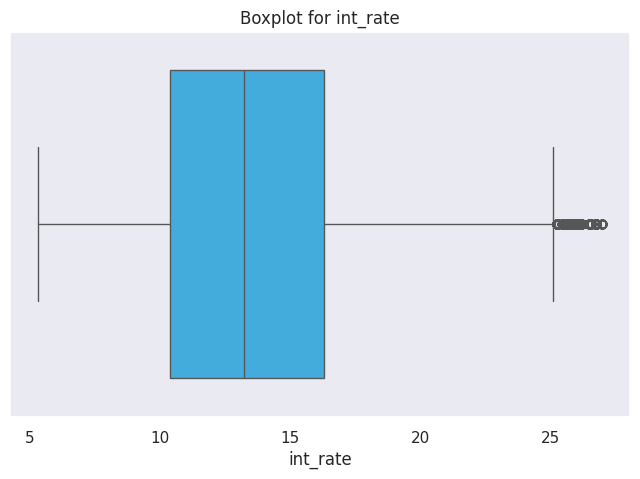

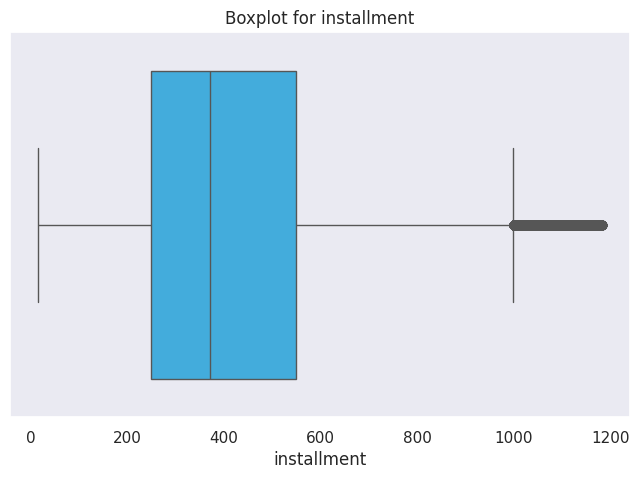

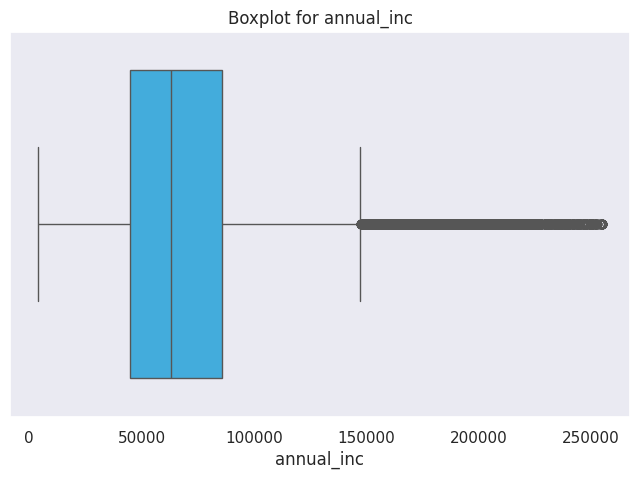

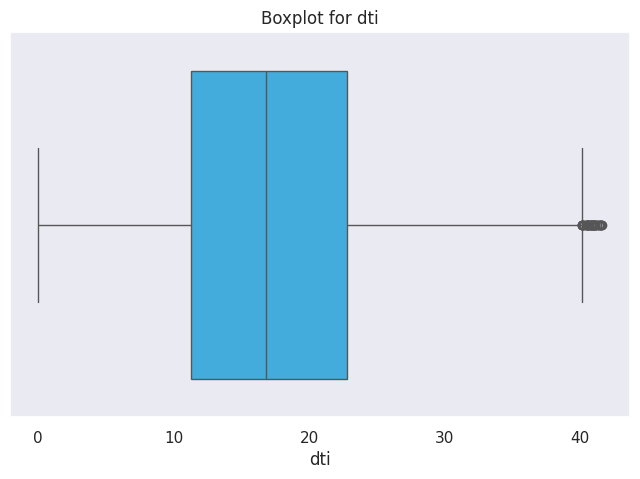

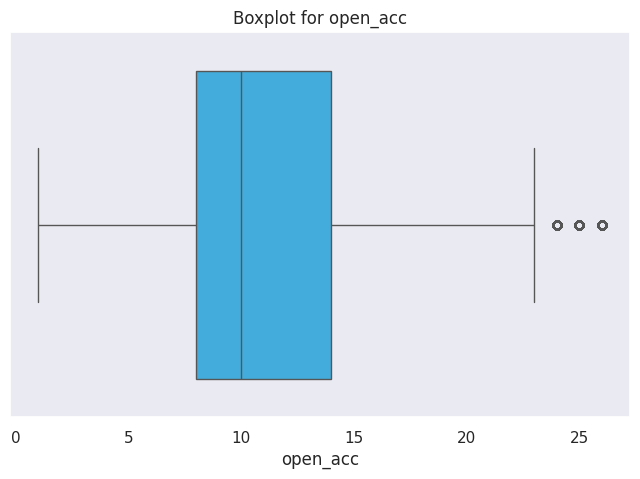

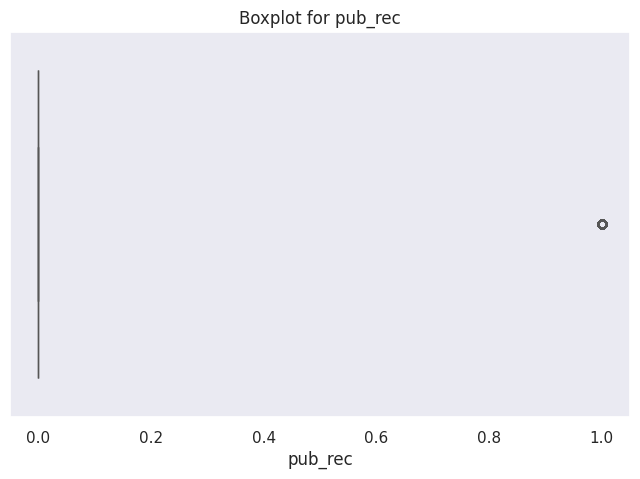

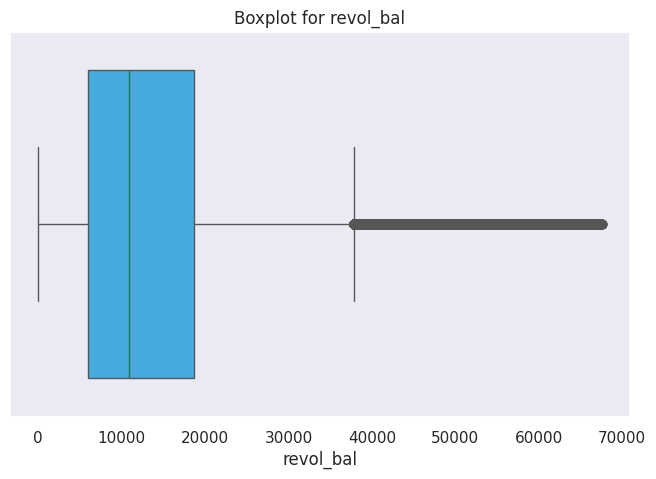

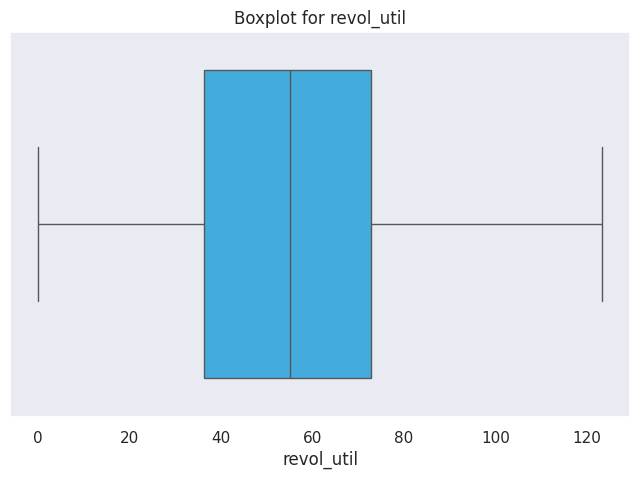

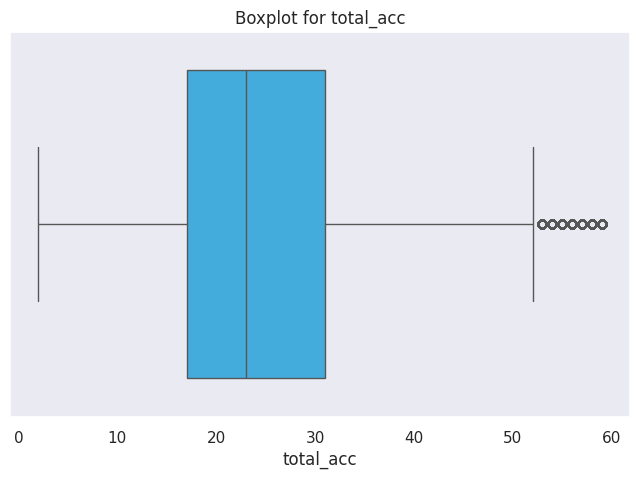

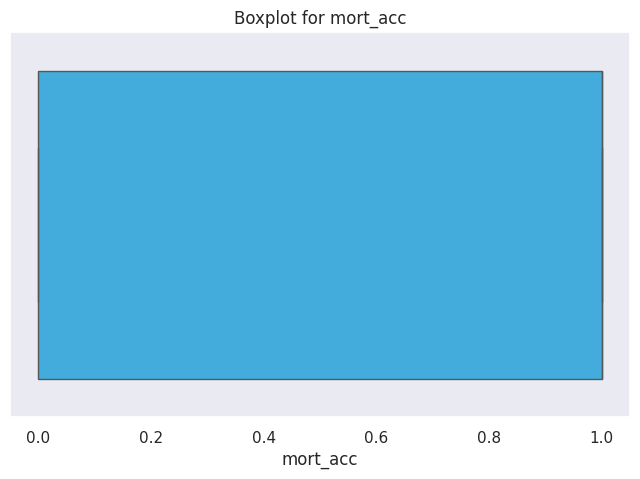

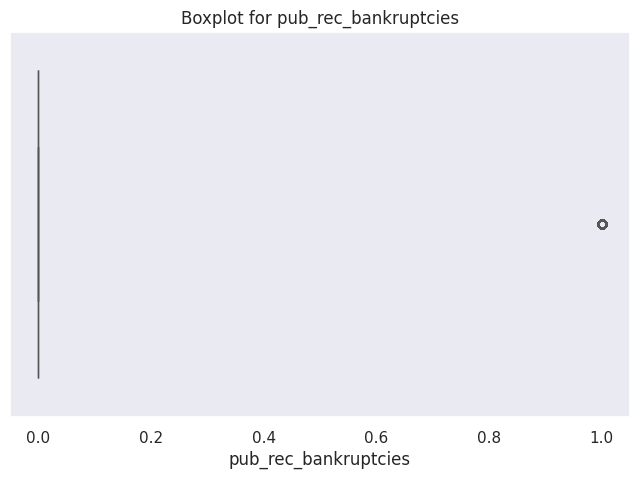

In [138]:
def box_plot(col):
    if col in df.columns:
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=df[col],color="#29B6F6")
        plt.title('Boxplot for {}'.format(col))
        plt.show()
    else:
        print(f"Column '{col}' not found in the DataFrame.")

for col in n_columns:
    box_plot(col)

In [139]:
term_values = {' 36 months': 36, ' 60 months': 60}

df['term'] = df['term'].map(term_values)

df['loan_status'] = df['loan_status'].map({'Fully Paid': 0, 'Charged Off': 1})

list_status = {'w': 0, 'f': 1}

df['initial_list_status'] = df['initial_list_status'].map(list_status)

df['zip_code'] = df['address'].apply(lambda x: x[-5:])

df['zip_code'].value_counts(normalize=True) * 100

,proportion
zip_code,
70466,14.375337
30723,14.289710
22690,14.272299
48052,14.127019
00813,11.605591
29597,11.548792
05113,11.519108
93700,2.768605
11650,2.762896


In [140]:
# Dropping of unnecessary columns

unnecessary_columns=['issue_d', 'emp_title', 'title', 'sub_grade','address', 'earliest_cr_line', 'emp_length']

df.drop(unnecessary_columns,axis=1, inplace=True)

### One hot encoding

In [141]:
dummies=['purpose', 'zip_code', 'grade', 'verification_status', 'application_type', 'home_ownership']

data=pd.get_dummies(df,columns=dummies,drop_first=True)

pd.set_option('display.max_columns',None)

pd.set_option('display.max_rows',None)

In [142]:
from sklearn.model_selection import train_test_split

X=data.drop('loan_status',axis=1)
y=data['loan_status']
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.30,stratify=y,random_state=42)
print(X_train.shape)
print(X_test.shape)

(245249, 51)
(105108, 51)


### Model Building

In [143]:
# Importing stats libraries

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve, auc,
    ConfusionMatrixDisplay, RocCurveDisplay
)
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [144]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [145]:
logreg=LogisticRegression(max_iter=1000)

logreg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [146]:
y_pred = logreg.predict(X_test)

print('Accuracy of Logistic Regression Classifier on test set: {:.3f}'.format(logreg.score(X_test, y_test)))

Accuracy of Logistic Regression Classifier on test set: 0.891


In [147]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     84915
           1       0.94      0.46      0.62     20193

    accuracy                           0.89    105108
   macro avg       0.91      0.73      0.78    105108
weighted avg       0.90      0.89      0.88    105108



[[84341   574]
 [10889  9304]]


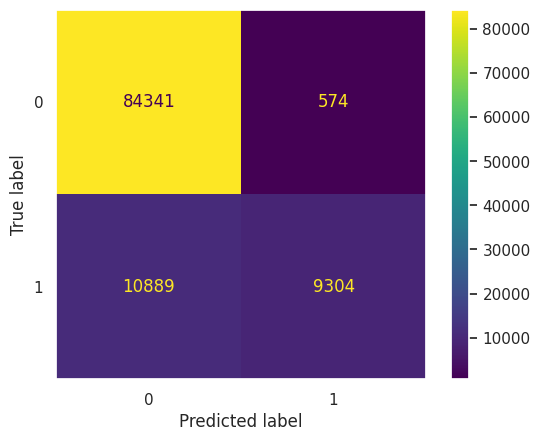

In [148]:
#Plot confusion Matrix

confusion_matrix=confusion_matrix(y_test,y_pred)

print(confusion_matrix)

ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=logreg.classes_).plot()

#### ROC Curve -

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

- True Positive Rate
- False Positive Rate

True Positive Rate (TPR) is a synonym for recall and is therefore defined as follows:

- TPR=(TP)/(TP+FN)

False Positive Rate (FPR) is defined as follows:

- FPR=(FP)/(FP+TN)

An ROC curve plots TPR vs. FPR at different classification thresholds. Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives. The following figure shows a typical ROC curve.

#### AUC (Area under the ROC Curve) -

AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1).


AUC provides an aggregate measure of performance across all possible classification thresholds. One way of interpreting AUC is as the probability that the model ranks a random positive example more highly than a random negative example. For example, given the following examples, which are arranged from left to right in ascending order of logistic regression predictions:

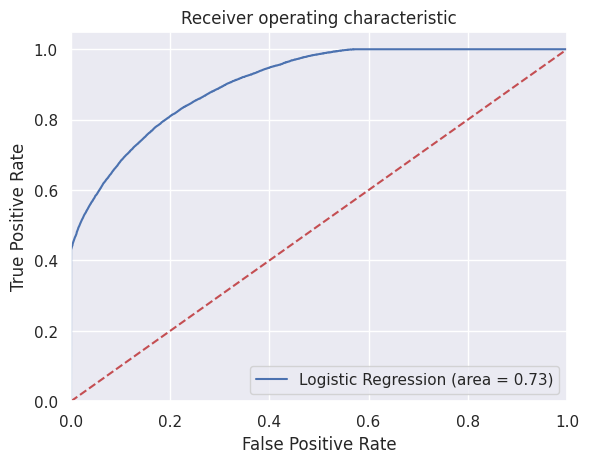

In [149]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])


plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.grid()
plt.show()

#### Insights:

- ROC-AUC curve is grossing the area near about 0.73 which indicates that model is performing well.
- There is still room for some model improvement
- By collecting more data, using a more complex model, or tuning the hyperparameters, it is possible to improve the model's performance.

### Precision-Recall Curve

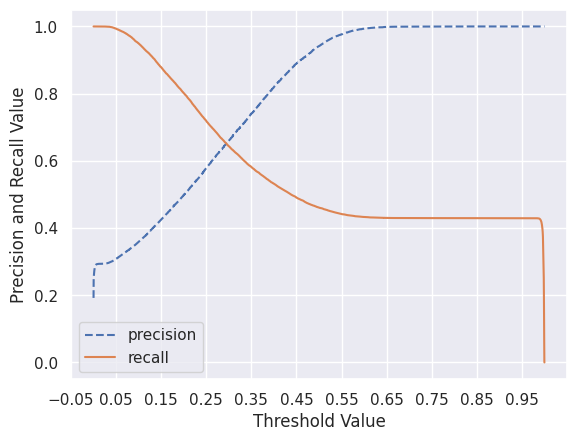

In [150]:
precisions, recalls, thresholds = precision_recall_curve(y_test, logreg.predict_proba(X_test)[:, 1])

threshold_boundary = thresholds.shape[0]

# Plot precision
plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')

# Plot recall
plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')

start, end = plt.xlim()
plt.xticks(np.round(np.arange(start, end, 0.1), 2))

plt.xlabel('Threshold Value')
plt.ylabel('Precision and Recall Value')
plt.legend()
plt.grid()
plt.show()

**Insights**

- Precision score is highest at 0.55 threshold. High precision value indicates that model is positevly predicating the charged off loan status which helps business to take more stable decision.
- Recall score is higher on smaller threshold but after 0.55 the recall value is constant. Model is correctly classifying the actual predicated values as instances.

**Actional Insights and Recommendations**

1. 80% of the customers have paid the loan fully.
2. 20% of the customers are the defaulters.
3. The organization can the trained model to make prediction for whether a person will likely to pay the loan amount or he will be a defaulter.
4. Model achieves the 94% f1-score for the negative class (Fully Paid).
5. Model achieves the 62% f1-score for the positive class (Charged off).
6. Cross Validation accuracy and testing accuracy is almost same which infers model is performing the decent job. We can trust this model for unseen data
7. By collecting more data, using a more complex model, or tuning the hyperparameters, it is possible to improve the model's performance.
8. ROC AUC curve area of 0.73, the model is correctly classifying about 73% of the instances. This is a good performance, but there is still room for improvement.
9. The precision-recall curve allows us to see how the precision and recall trade-off as we vary the threshold. A higher threshold will result in higher precision, but lower recall, and vice versa. The ideal point on the curve is the one that best meets the needs of the specific application.
10. After balancing the dataset, there is significant change observed in the precion and recall score for both of the classes.
11. Accuracy of Logistic Regression Classifier on test set: 0.891 which is decent and not by chance